In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/yldrm/Desktop/gayesu/Data/FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [3]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


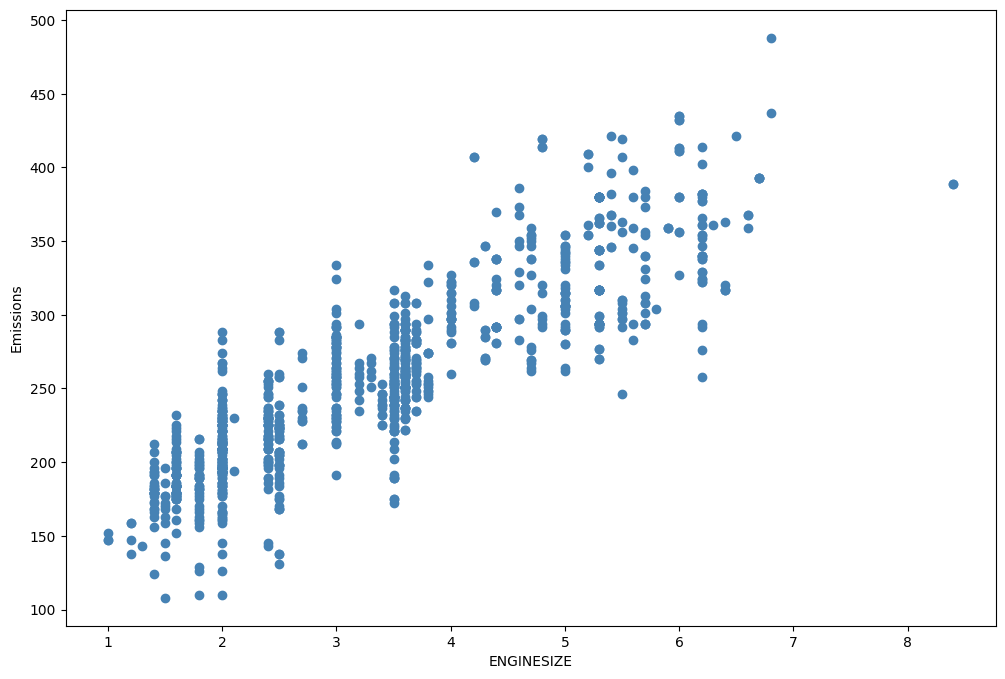

In [4]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [7]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    1.3   1.69]
 [ 1.    5.2  27.04]
 [ 1.    5.   25.  ]
 ...
 [ 1.    6.2  38.44]
 [ 1.    2.5   6.25]
 [ 1.    1.6   2.56]]


In [8]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [9]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         51.91051622 -1.67522795]]
Intercept: [104.96230282]


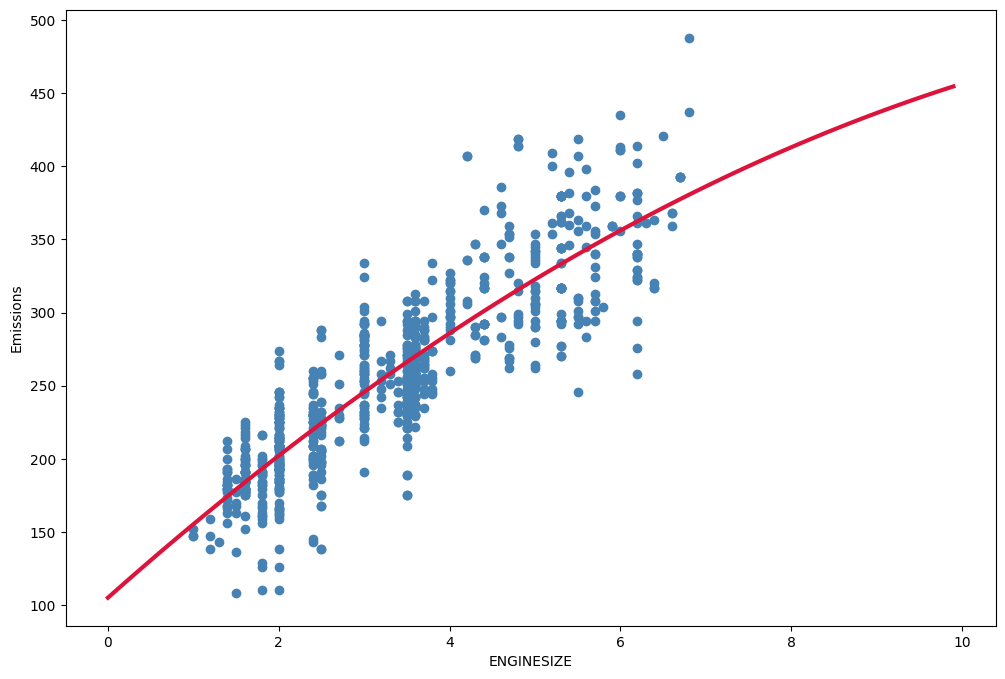

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [11]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[104.96230282 110.13660216 115.27739695 120.38468717 125.45847284
 130.49875394 135.50553049 140.47880248 145.41856991 150.32483278
 155.19759109 160.03684484 164.84259404 169.61483867 174.35357875
 179.05881426 183.73054522 188.36877162 192.97349346 197.54471074
 202.08242346 206.58663163 211.05733523 215.49453427 219.89822876
 224.26841869 228.60510405 232.90828486 237.17796111 241.4141328
 245.61679993 249.78596251 253.92162052 258.02377398 262.09242287
 266.12756721 270.12920698 274.0973422  278.03197286 281.93309896
 285.80072051 289.63483749 293.43544991 297.20255778 300.93616108


In [31]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")


Mean Absolute Error (MAE): 23.34
Mean Squared Error (MSE): 956.32
R2-Score: 0.77


In [13]:
poly = PolynomialFeatures(degree=3)

In [15]:
train_x_poly_3=poly.fit_transform(train_x)
train_y_3 = clf.fit(train_x_poly_3, train_y)

In [16]:
clf.coef_

array([[ 0.        , 41.65078359,  1.30491145, -0.26105787]])

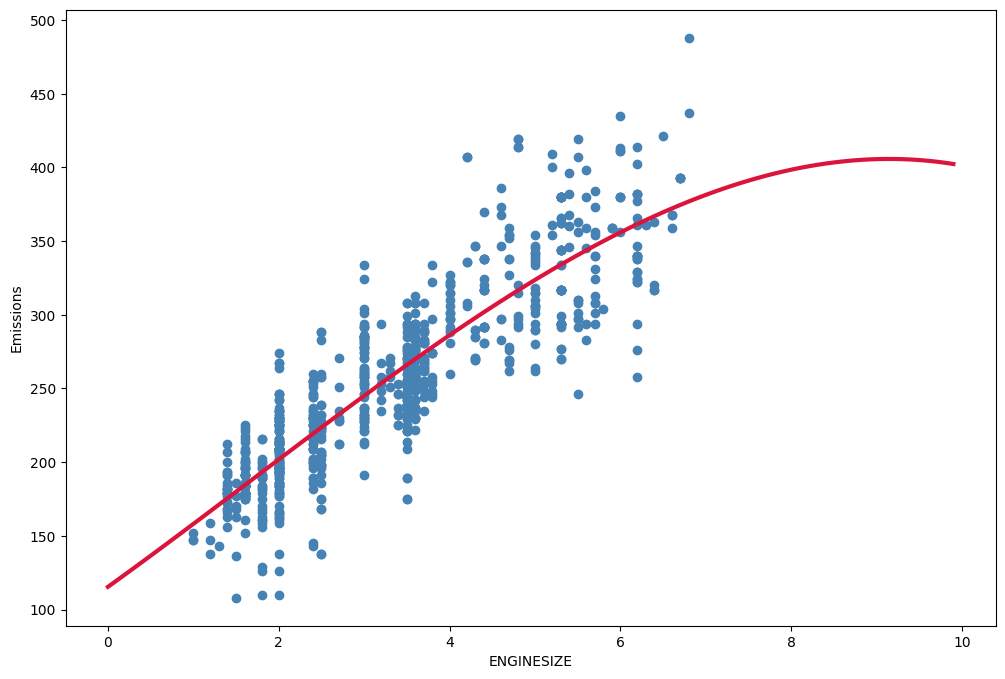

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)+ clf.coef_[0][3] * np.power(XX, 3)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [39]:
test_x_poly_3 = poly.fit_transform(test_x)
pred = clf.predict(test_x_poly_3)


In [44]:
print(f'MAE = %.2f' % np.mean(abs(test_y - pred)))

MAE = 23.34


In [46]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_y, pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 23.34


In [47]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 956.32


In [48]:
from sklearn.metrics import r2_score
print(f"R2:{r2_score(test_y,pred):.2f}")

R2:0.77
